In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"
#to read file 
city_data_df=pd.read_csv("resources/city_data.csv")
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
ride_data_df=pd.read_csv("resources/ride_data.csv")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739411e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343912e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005066e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149245e+12
4,South Jack,3/6/19 4:28,34.58,3.908451e+12
5,South Latoya,3/11/19 12:26,9.52,1.994999e+12
6,New Paulville,2/27/19 11:17,43.25,7.932084e+11
7,Simpsonburgh,4/26/19 0:43,35.98,1.119539e+11
8,South Karenland,1/8/19 3:28,35.09,7.995623e+12
9,North Jasmine,3/9/19 6:26,42.81,5.327642e+12


In [4]:
#get all the columns that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
#check the datatype
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [6]:
#get all the null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#use unique() for the array of unique values on type columnn
city_data_df['type'].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
#get the total number of city which is under urban datatype
sum(city_data_df['type']=='Urban')

66

In [9]:
sum(city_data_df['type']=='Suburban')

36

In [10]:
sum(city_data_df['type']=='Rural')

18

In [11]:
#now inspect ride data frame

In [12]:
#get column that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
#get the all null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#get the data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [15]:
#convert the datatypes o ride_id col from float to int
#ride_data_df['ride_id']=ride_data_df['ride_id'].astype(int)
ride_data_df["ride_id"] = pd.to_numeric(ride_data_df["ride_id"], downcast='integer')

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873
1,South Michelleport,3/4/19 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178
4,South Jack,3/6/19 4:28,34.58,3908451377344


In [18]:
#merge the data set in one dataframe
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
#display the dataframe
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908451377344,46,Urban
5,South Latoya,3/11/19 12:26,9.52,1994999424437,10,Urban
6,New Paulville,2/27/19 11:17,43.25,793208410091,44,Urban
7,Simpsonburgh,4/26/19 0:43,35.98,111953927754,21,Urban
8,South Karenland,1/8/19 3:28,35.09,7995623208694,4,Urban
9,North Jasmine,3/9/19 6:26,42.81,5327642267789,33,Urban


In [19]:
#creating 3 DataFrame for 3 diff city types from filterring on Pyber_data_df 
urban_city_df=pyber_data_df[pyber_data_df['type']=='Urban']
urban_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908451377344,46,Urban


In [20]:
#Suburban
suburban_city_df=pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_city_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/19 3:08,27.79,6653622887913,11,Suburban
1626,East Kentstad,4/7/19 19:44,18.75,6575961095852,20,Suburban
1627,Lake Omar,1/17/19 21:33,21.71,966911700371,22,Suburban
1628,Myersshire,2/27/19 17:38,17.10,5706770909868,19,Suburban
1629,West Hannah,4/19/19 1:06,37.78,2273047151891,12,Suburban


In [21]:
#Rural
rural_city_df=pyber_data_df[pyber_data_df['type']=='Rural']
rural_city_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/19 11:13,43.22,1076079536213,9,Rural
2251,North Holly,2/2/19 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,3/27/19 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2/23/19 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,5/6/19 8:57,51.80,4018025271936,2,Rural


In [22]:
#get the no of rides for each city(urban)
urban_city_count=urban_city_df.groupby(["city"]).count()["ride_id"]
urban_city_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [23]:
#(suburban)
suburban_city_count=suburban_city_df.groupby(["city"]).count()["ride_id"]
suburban_city_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [24]:
#rural
rural_city_count=rural_city_df.groupby(["city"]).count()["ride_id"]
rural_city_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [25]:
#avarage fare for each city type
#urban
urban_avg_count=urban_city_df.groupby(["city"]).mean()["fare"]
urban_avg_count.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [26]:
#suburban
suburban_avg_count=suburban_city_df.groupby(["city"]).mean()["fare"]
suburban_avg_count.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [27]:
#rural
rural_avg_count=rural_city_df.groupby(["city"]).mean()["fare"]
rural_avg_count.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [28]:
#get the avg. no of drivers for each city type 
#urban
avg_drivers=urban_city_df.groupby(['city']).mean()["driver_count"]
avg_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [29]:
#suburban
avg_drivers_sub=suburban_city_df.groupby(['city']).mean()["driver_count"]
avg_drivers_sub.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [30]:
#rural
avg_drivers_rural=rural_city_df.groupby(['city']).mean()["driver_count"]
avg_drivers_rural.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

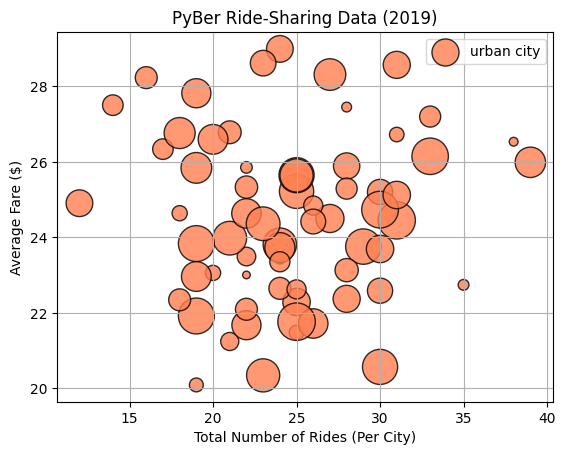

In [31]:
#CREATE SCATTER CHART
#urban city bubble chart x=urban_ride_coount y=urban avg fare
# Build the scatter plots for urban cities.
plt.scatter(urban_city_count, urban_avg_count, 
            s=10*avg_drivers,c="coral",
            label="urban city",
           edgecolor="black",
            alpha=0.8,
           linewidth=1)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()


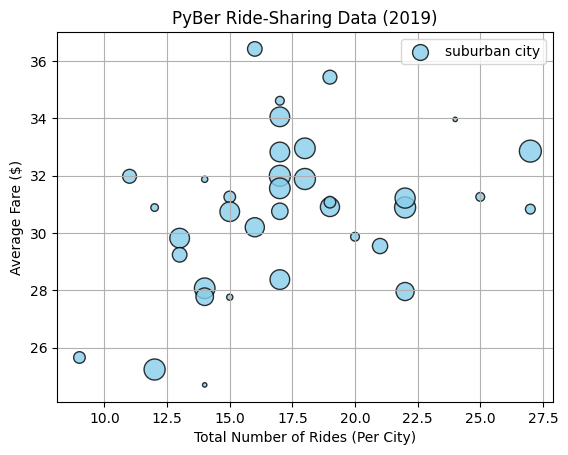

In [32]:
#suburban city chart
plt.scatter(suburban_city_count, suburban_avg_count, 
            s=10*avg_drivers_sub,c="skyblue",
            label="suburban city",
           edgecolor="black",
            alpha=0.8,
           linewidth=1)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()


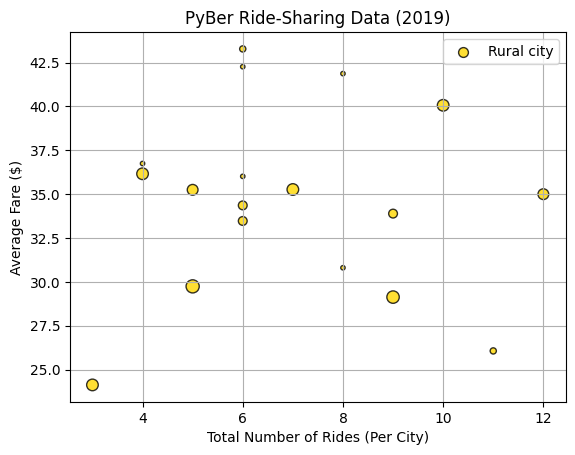

In [33]:
plt.scatter(rural_city_count, rural_avg_count, 
            s=10*avg_drivers_rural,c="gold",
            label="Rural city",
           edgecolor="black",
            alpha=0.8,
           linewidth=1)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()


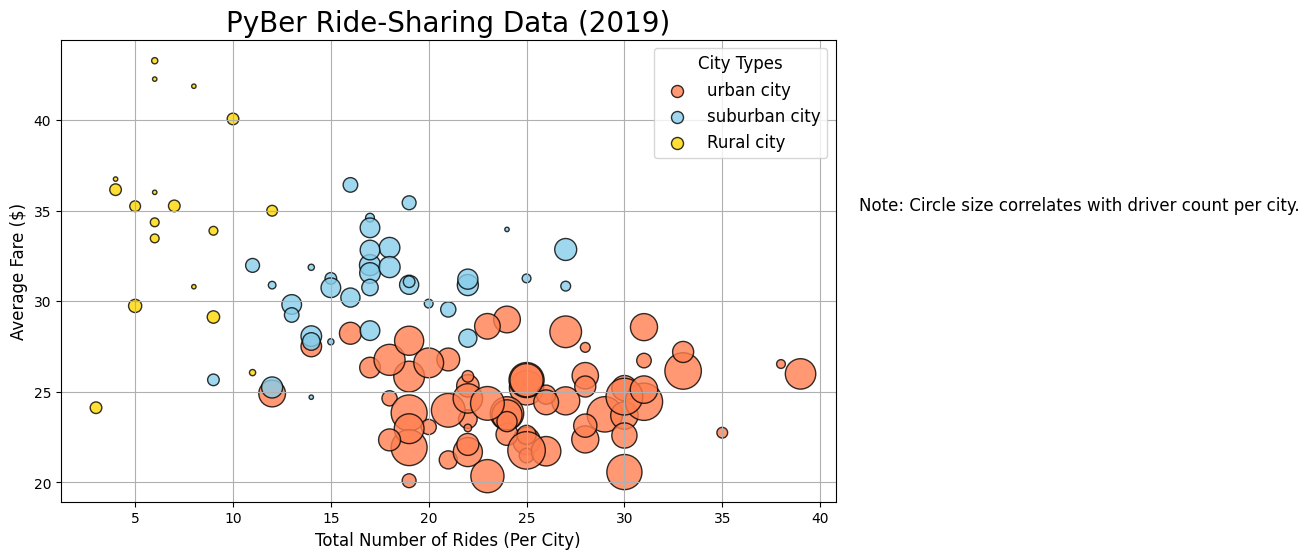

In [34]:
#city types in one chart
plt.subplots(figsize=(10, 6))
plt.scatter(urban_city_count, urban_avg_count, 
            s=10*avg_drivers,c="coral",
            label="urban city",
           edgecolor="black",
            alpha=0.8,
           linewidth=1)

plt.scatter(suburban_city_count, suburban_avg_count, 
            s=10*avg_drivers_sub,c="skyblue",
            label="suburban city",
           edgecolor="black",
            alpha=0.8,
           linewidth=1)

plt.scatter(rural_city_count, rural_avg_count, 
            s=10*avg_drivers_rural,c="gold",
            label="Rural city",
           edgecolor="black",
            alpha=0.8,
           linewidth=1)

plt.ylabel('Average Fare ($)',fontsize=12)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42,35 ,"Note: Circle size correlates with driver count per city.",fontsize="12")
#save figure as image
plt.savefig("analysis/fig1.png")


In [35]:
#summry statistics 
#get the summary statistics city types vise


In [36]:
#urban city statistics summary
urban_city_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [37]:
#suburban city statistics summary
suburban_city_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [38]:
#rural city statistics summary
rural_city_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [39]:
#summary statistics of ride count
urban_city_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [40]:
#suburban ride count summery
suburban_city_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [41]:
#rural ride count summary
rural_city_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [42]:
# Calculate the mean of the ride count for each city type.
round(urban_city_count.mean(),2), round(suburban_city_count.mean(),2), round(rural_city_count.mean(),2)

(24.62, 17.36, 6.94)

In [43]:
#calculate median of the ride count for each city
round(urban_city_count.median(),2), round(suburban_city_count.median(),2), round(rural_city_count.median(),2)

(24.0, 17.0, 6.0)

In [44]:
#calculate mode of the ride count on each city type
#urban
urban_city_count.mode()


0    22
1    25
dtype: int64

In [45]:
#suburban
suburban_city_count.mode()

0    17
dtype: int64

In [46]:
#rural
rural_city_count.mode()

0    6
dtype: int64

In [47]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_city_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_city_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_city_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [48]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_city_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_city_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_city_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [49]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_city_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_city_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_city_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [50]:
#get the fare data from fare columns by each city types
#get the fare from urban city
# Get the fares for the urban cities.
urban_fares = urban_city_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [51]:
#get thhe fares for the suburban cities
suburban_fares=suburban_city_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [52]:
#get the fares for the rural cities
rural_fares=rural_city_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [53]:
#find mean median mode of city fare by Numpy
#urban cities
mean_urban_fare=np.mean(urban_fares)
print(f"the mean for the fare of city for urban trips is {mean_urban_fare:.2f}.")
median_urban_fare=np.median(urban_fares)
print(f"the median for the fare of city for urban trips is {median_urban_fare}.")
mode_urban_fare=sts.mode(urban_fares)
print(f"the mode for the fare of city for urban trips is {mode_urban_fare}.")

the mean for the fare of city for urban trips is 24.53.
the median for the fare of city for urban trips is 24.64.
the mode for the fare of city for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [54]:
#suburban cities
mean_suburban_fare=np.mean(suburban_fares)
print(f"the mean for the fare of city for suburban trips is {mean_suburban_fare:.2f}.")
median_suburban_fare=np.median(suburban_fares)
print(f"the median for the fare of city for suburban trips is {median_suburban_fare}.")
mode_suburban_fare=sts.mode(suburban_fares)
print(f"the mode for the fare of city for suburban trips is {mode_suburban_fare}.")

the mean for the fare of city for suburban trips is 30.97.
the median for the fare of city for suburban trips is 30.75.
the mode for the fare of city for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [55]:
#rural cities
mean_rural_fare=np.mean(rural_fares)
print(f"the mean for the fare of city for rural trips is {mean_rural_fare:.2f}.")
median_rural_fare=np.median(rural_fares)
print(f"the median for the fare of city for rural trips is {median_rural_fare}.")
mode_rural_fare=sts.mode(rural_fares)
print(f"the mode for the fare of city for rural trips is {mode_rural_fare}.")

the mean for the fare of city for rural trips is 34.62.
the median for the fare of city for rural trips is 37.05.
the mode for the fare of city for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [56]:
# Get the driver count data from the all cities.
# Get the driver count data from the urban cities.
urban_drivers = urban_city_df['driver_count']
urban_drivers.head()


0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [57]:
#get the driver count data from the suburban cities.
suburban_drivers=suburban_city_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [58]:
#get the driver count data from the rural cities.
rural_drivers=rural_city_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [59]:
#calculate mean median mode on driver_count
#calculate statistic summury on urban driver count
mean_urban_dcount=np.mean(urban_drivers)
print(f"the mean for the drivers count of city for urban trips is {mean_urban_dcount:.2f}.")
median_urban_dcount=np.median(urban_drivers)
print(f"the median for  the drivers count of city for urban trips is   {median_urban_dcount}.")
mode_urban_dcount=sts.mode(urban_drivers)
print(f"the mode for  the drivers count of city for urban trips is  {mode_urban_dcount}.")

the mean for the drivers count of city for urban trips is 36.68.
the median for  the drivers count of city for urban trips is   37.0.
the mode for  the drivers count of city for urban trips is  ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [60]:
#calculate statistic summury on suburban driver count
mean_suburban_dcount=np.mean(suburban_drivers)
print(f"the mean for the drivers count of city for suburban trips is {mean_suburban_dcount:.2f}.")
median_suburban_dcount=np.median(suburban_drivers)
print(f"the median for  the drivers count of city for suburban trips is   {median_suburban_dcount}.")
mode_suburban_dcount=sts.mode(suburban_drivers)
print(f"the mode for  the drivers count of city for suburban trips is  {mode_suburban_dcount}.")

the mean for the drivers count of city for suburban trips is 13.71.
the median for  the drivers count of city for suburban trips is   16.0.
the mode for  the drivers count of city for suburban trips is  ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [61]:
#calculate statistic summury on urban driver count
mean_rural_dcount=np.mean(rural_drivers)
print(f"the mean for the drivers count of city for rural trips is {mean_rural_dcount:.2f}.")
median_rural_dcount=np.median(rural_drivers)
print(f"the median for  the drivers count of city for rural trips is   {median_rural_dcount}.")
mode_rural_dcount=sts.mode(rural_drivers)
print(f"the mode for  the drivers count of city for rural trips is  {mode_rural_dcount}.")

the mean for the drivers count of city for rural trips is 4.30.
the median for  the drivers count of city for rural trips is   4.0.
the mode for  the drivers count of city for rural trips is  ModeResult(mode=array([1], dtype=int64), count=array([32])).


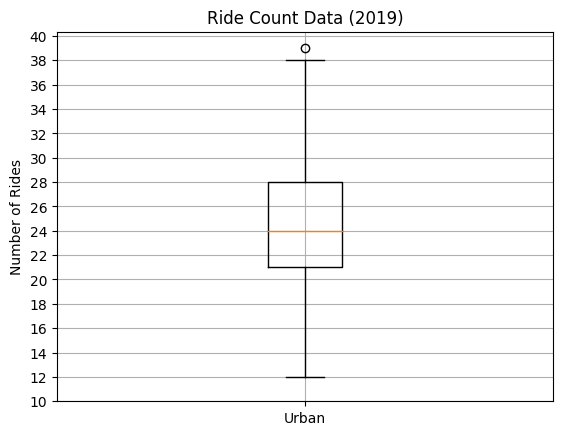

In [62]:
#craete box and whisker plot for urban city ride count
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_city_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

In [63]:
#summary of city ride count 
urban_city_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

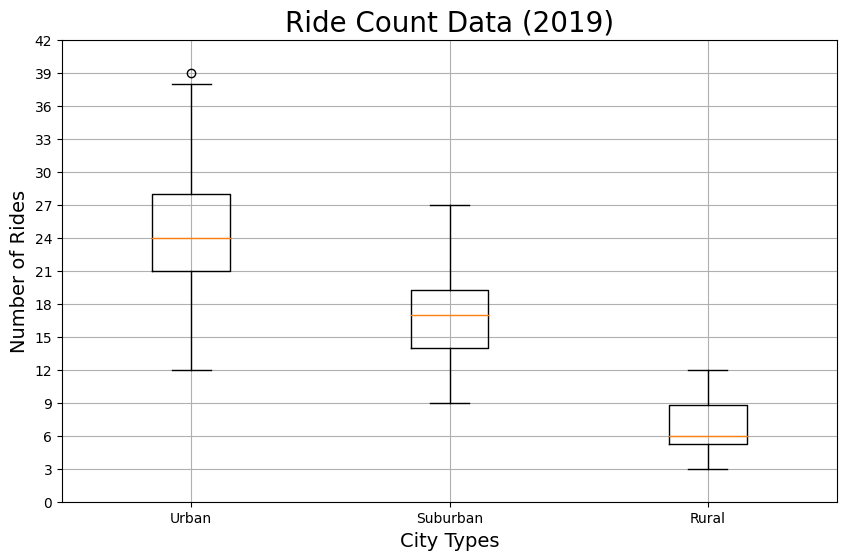

In [64]:
#create box whiskers plot for all city types
x_labels = ["Urban","Suburban","Rural"]
ride_count_data=[urban_city_count,suburban_city_count,rural_city_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [65]:
# Get the city that matches 39.
urban_city_outlier = urban_city_count[urban_city_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


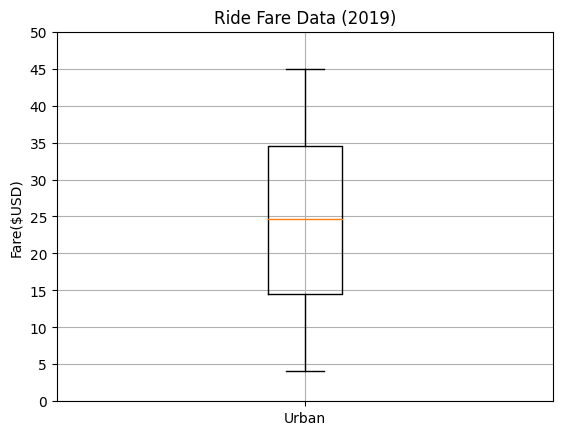

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [66]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

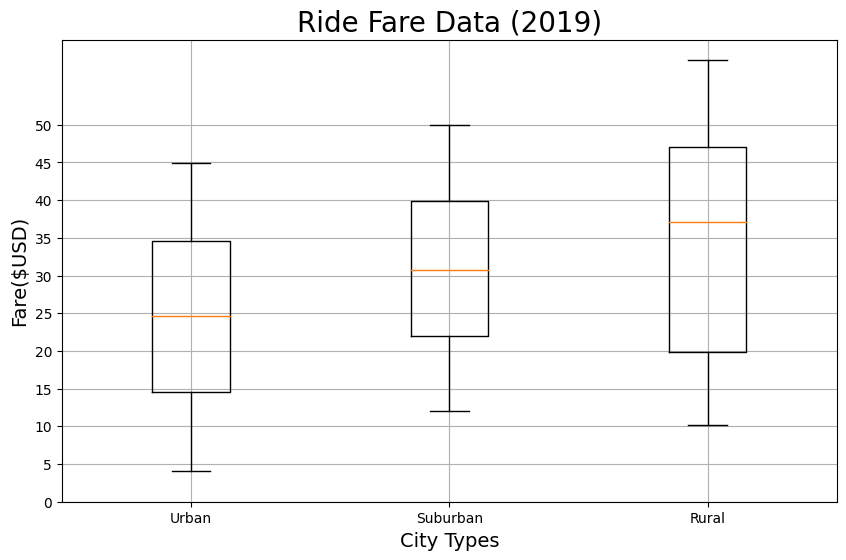

In [67]:
#create box and whisker plot for ride fare data

x_labels=("Urban","Suburban","Rural")
ride_fare_data=[urban_fares,suburban_fares,rural_fares]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(ride_fare_data,labels=x_labels)
#add title y axis label and grid
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.savefig("analysis/fig3.png")
plt.show()


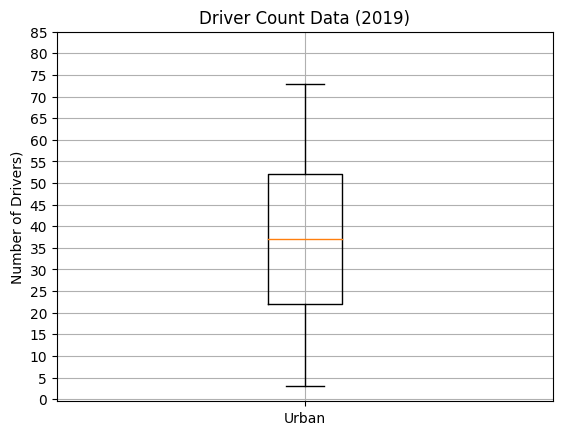

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [68]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

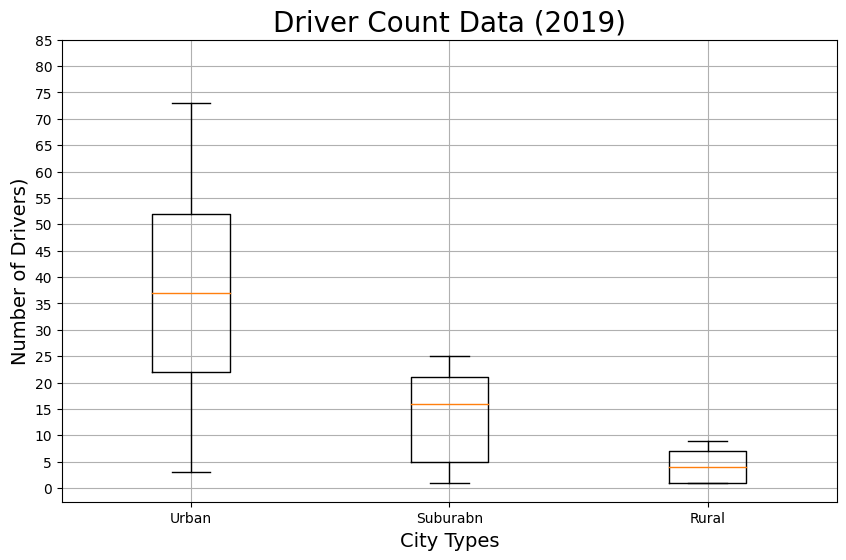

In [69]:
# Create the box-and-whisker plot for the urban driver count data for all city types
x_labels = ["Urban","Suburabn","Rural"]
drivers_count_data=[urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(drivers_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers)',fontsize=14)
ax.set_xlabel('City Types',fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.savefig('analysis/fig4.png')
plt.show()


In [70]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [71]:
#get total no of fares
total_fares=pyber_data_df['fare'].sum()
total_fares

63538.64

In [72]:
#get percentage of total fares
percentage_fare=100*sum_fares_by_type/total_fares
percentage_fare

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [73]:
#get percentage of fares for all cities in one line code
percentage_fare_cities=100*pyber_data_df.groupby(['type']).sum()["fare"]/pyber_data_df['fare'].sum()
percentage_fare_cities

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

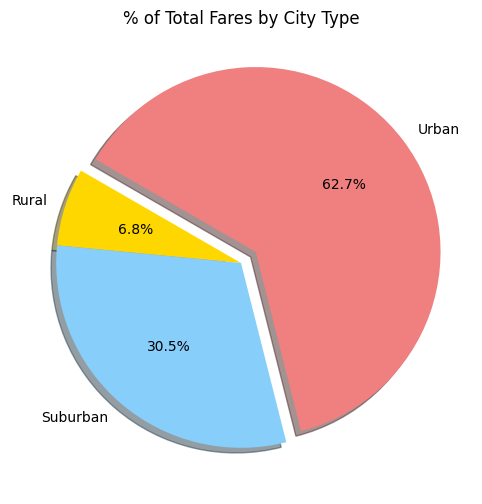

In [74]:
#create pie chart from percentage of fare by city
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(percentage_fare_cities,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [75]:
#create pie chart for % of total rides by city type
#percentage of total rides by city types
percentage_ride=100*pyber_data_df.groupby(['type']).count()['ride_id']/pyber_data_df['ride_id'].count()
percentage_ride

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

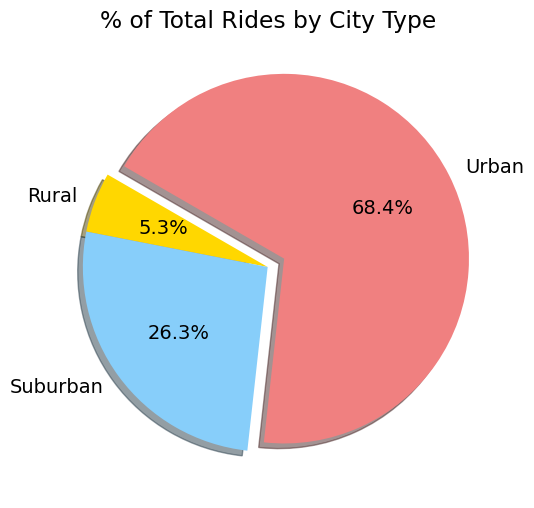

In [76]:
## Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(percentage_ride,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [77]:
#percentage of total driversby city types
percentage_drivers=100*pyber_data_df.groupby(['type']).sum()['driver_count']/pyber_data_df['driver_count'].sum()
percentage_drivers

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

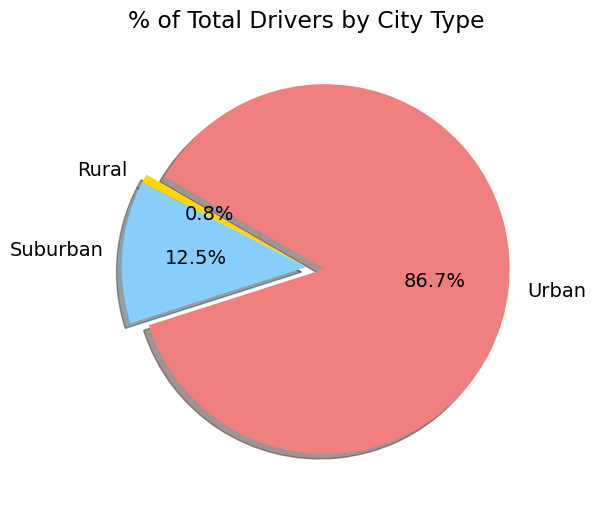

In [78]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(percentage_drivers,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [79]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 *city_data_df.groupby(["type"]).sum()["driver_count"] /city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

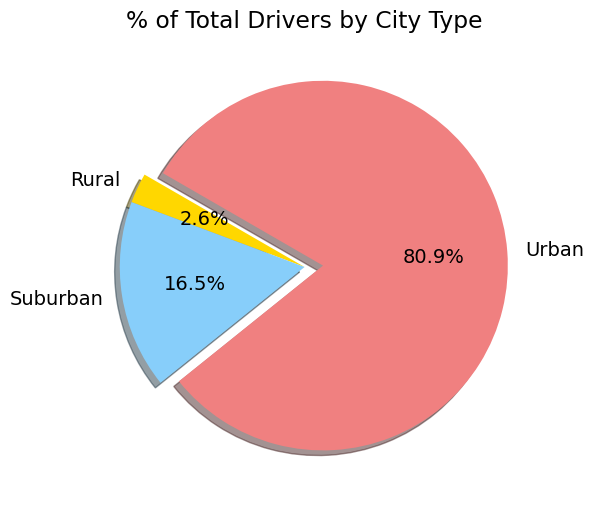

In [80]:
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig8.png")
# Show Figure
plt.show()